United States           122
Germany                  59
China                    34
France                   24
Canada                   24
United Kingdom           21
Netherlands              18
Australia                15
Switzerland              14
Japan                    13
Italy                    10
Poland                   10
Spain                     7
New Zealand               7
Czechia                   6
Austria                   6
Sweden                    5
Denmark                   5
Hungary                   4
Finland                   4
Belgium                   4
Singapore                 4
Bulgaria                  3
Russia                    3
India                     3
Brazil                    3
United Arab Emirates      2
Hong Kong                 2
Portugal                  2
Indonesia                 2
Malaysia                  2
Norway                    2
Pakistan                  2
Taiwan                    2
Egypt                     1
Vietnam             

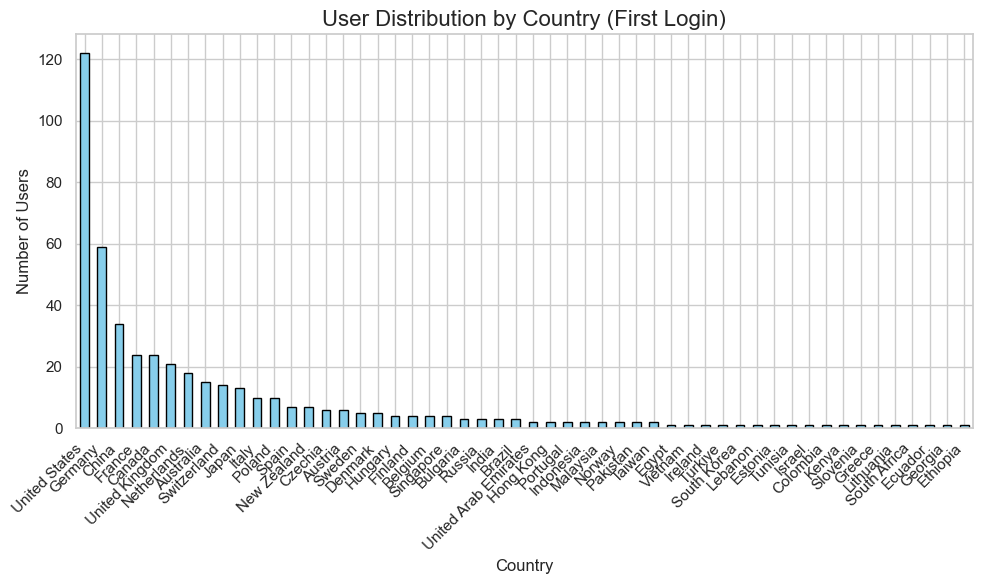

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 示例数据
file_path = r"C:/Users/王志鸿\Desktop/导论/users_combined_info_500.csv"

# 加载数据
data = pd.read_csv(file_path)

# 创建 DataFrame
columns = ['user_id', 'name', 'location', 'total_influence', 'country', 'event_type', 'event_action', 'event_time']
df = pd.DataFrame(data, columns=columns)

# 先确保 'event_time' 列是 datetime 类型
df['event_time'] = pd.to_datetime(df['event_time'])

# 按 'user_id' 和 'event_time' 排序，确保每个用户的首次登录记录排在前面
df_sorted = df.sort_values(by=['user_id', 'event_time'])

# 对每个用户去重，只保留首次登录的国家
df_unique = df_sorted.drop_duplicates(subset=['user_id'], keep='first')

# 统计每个国家的用户数量
country_counts = df_unique['country'].value_counts()

# 打印统计结果
print(country_counts)

# 绘制国家分布图
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# 设置图形标题和标签
plt.title('User Distribution by Country (First Login)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# 旋转x轴标签
plt.xticks(rotation=45, ha='right')

# 防止标签重叠
plt.tight_layout()

# 显示图形
plt.show()


人数不少于5的城市：
Germany                   23
Berlin, Germany            7
San Francisco              7
Japan                      6
Paris, France              6
Switzerland                6
France                     5
Berlin                     5
Tokyo, Japan               5
Zurich, Switzerland        4
Singapore                  4
Beijing, China             4
Poland                     4
San Francisco, CA          4
New Zealand                4
London, UK                 3
Amsterdam, Netherlands     3
California                 3
Seattle, WA                3
Amsterdam                  3
Sydney, Australia          3
Italy                      3
Vienna, Austria            3
London                     3
Cambridge, MA              3
NYC                        3
United States              3
UK                         3
Netherlands                3
Sweden                     3
China                      3
Australia                  3
Houston, TX                3
Shanghai                   3
New

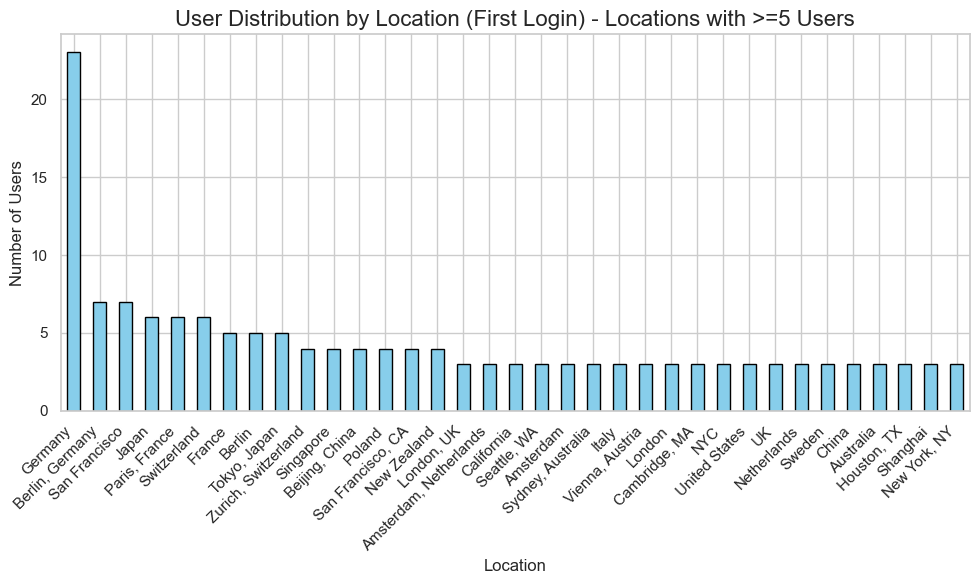

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 示例数据
file_path = r"C:/Users/王志鸿\Desktop/导论/users_combined_info_500.csv"

# 加载数据
data = pd.read_csv(file_path)

# 创建 DataFrame
columns = ['user_id', 'name', 'location', 'total_influence', 'country', 'event_type', 'event_action', 'event_time']
df = pd.DataFrame(data, columns=columns)

# 先确保 'event_time' 列是 datetime 类型
df['event_time'] = pd.to_datetime(df['event_time'])

# 按 'user_id' 和 'event_time' 排序，确保每个用户的首次登录记录排在前面
df_sorted = df.sort_values(by=['user_id', 'event_time'])

# 对每个用户去重，只保留首次登录的城市
df_unique = df_sorted.drop_duplicates(subset=['user_id'], keep='first')

# 统计每个城市的用户数量
location_counts = df_unique['location'].value_counts()

# 筛选出人数超过5的城市
location_counts_filtered = location_counts[location_counts >= 3]

# 打印筛选后的结果
print("人数不少于5的城市：")
print(location_counts_filtered)

# 绘制城市分布图（只绘制出不少于5人的城市分布图）
plt.figure(figsize=(10, 6))
location_counts_filtered.plot(kind='bar', color='skyblue', edgecolor='black')

# 设置图形标题和标签
plt.title('User Distribution by Location (First Login) - Locations with >=5 Users', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# 旋转x轴标签
plt.xticks(rotation=45, ha='right')

# 防止标签重叠
plt.tight_layout()

# 显示图形
plt.show()

Missing timezone for the following countries:
[nan 'Australia' 'New Zealand' 'India' 'Kenya' 'Vietnam' 'Türkiye'
 'Ethiopia' 'Tunisia' 'South Africa']


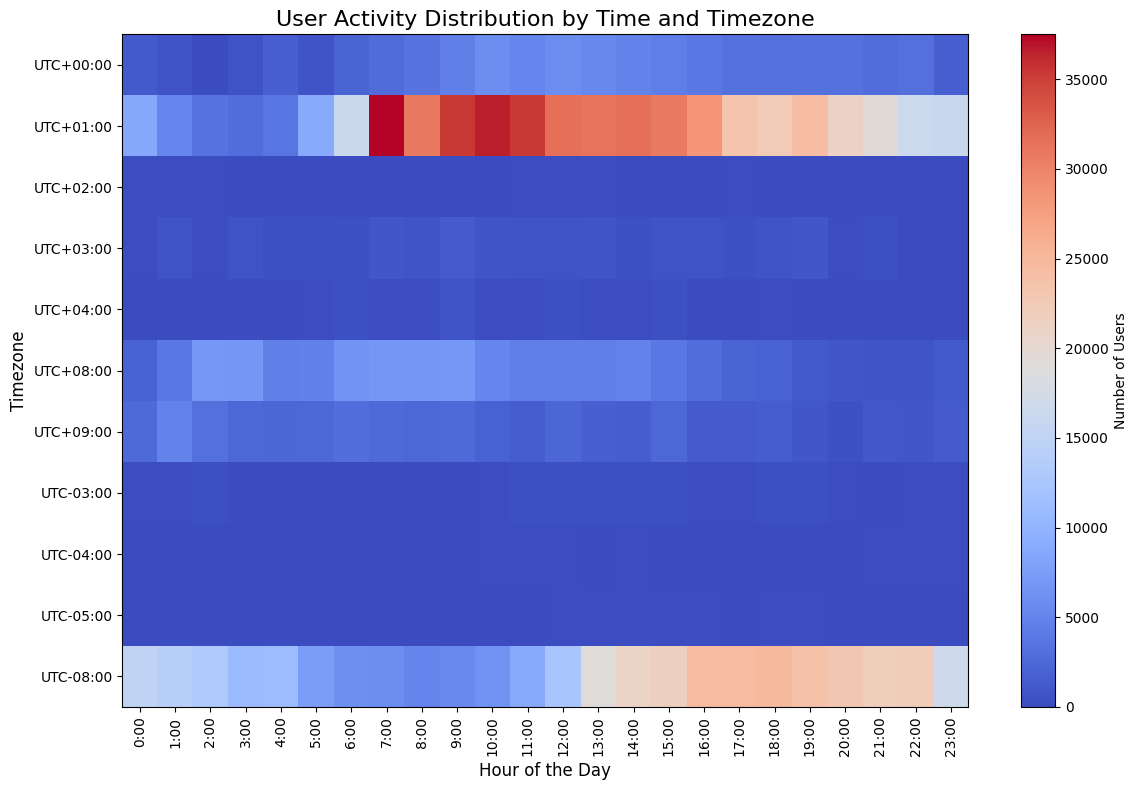

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import pytz
from datetime import datetime

# 示例数据文件路径
file_path = r"C:/Users/王志鸿/Desktop/导论/users_combined_info_500.csv"

# 尝试加载数据
try:
    data = pd.read_csv(file_path)
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# 创建 DataFrame
columns = ['user_id', 'name', 'location', 'total_influence', 'country', 'event_type', 'event_action', 'event_time']
df = pd.DataFrame(data, columns=columns)

# 确保 'event_time' 列是 datetime 类型
df['event_time'] = pd.to_datetime(df['event_time'])

# 提取小时信息
df['event_hour'] = df['event_time'].dt.hour

# 国家与时区映射
country_to_timezone = {
    'UTC+08:00': ['China', 'Singapore', 'Hong Kong', 'Taiwan', 'Malaysia', 'Indonesia', 'Philippines'],
    'UTC+09:00': ['Japan', 'South Korea'],
    'UTC+03:00': ['Russia', 'United Arab Emirates', 'Pakistan', 'Georgia', 'Lebanon', 'Israel'],
    'UTC+02:00': ['Egypt', 'Israel'],
    'UTC+01:00': ['Germany', 'France', 'United Kingdom', 'Spain', 'Italy', 'Netherlands', 'Belgium', 'Poland', 'Switzerland', 'Portugal', 'Czechia', 'Austria', 'Sweden', 'Denmark', 'Hungary', 'Finland', 'Bulgaria', 'Slovenia', 'Greece', 'Ireland', 'Norway', 'Estonia', 'Lithuania', 'Slovenia'],
    'UTC+00:00': ['United Kingdom', 'Ireland'],
    'UTC-03:00': ['Brazil'],
    'UTC-05:00': ['United States', 'Canada', 'Colombia', 'Ecuador'],
    'UTC-04:00': ['Colombia', 'Venezuela'],
    'UTC-06:00': ['Canada'],
    'UTC+03:30': ['Iran'],
    'UTC-08:00': ['United States', 'Canada'],
    'UTC-02:00': ['Atlantic Islands'],
    'UTC+04:00': ['Russia'],
    'UTC+04:30': ['Afghanistan'],
}

# 创建一个反向字典便于查找时区
timezone_to_country = {country: tz for tz, countries in country_to_timezone.items() for country in countries}

# 将时区映射到 DataFrame
df['timezone'] = df['country'].map(timezone_to_country)

# 检查是否有缺失的时区数据
missing_timezone = df[df['timezone'].isna()]
if not missing_timezone.empty:
    print("Missing timezone for the following countries:")
    print(missing_timezone['country'].unique())

# 计算每个时区和小时的用户活跃度
timezone_hour_distribution = df.groupby(['timezone', 'event_hour']).size().unstack(fill_value=0)

# 绘制时区与活跃时间分布图
plt.figure(figsize=(12, 8))

# 使用热力图显示活动分布
plt.imshow(timezone_hour_distribution, cmap='coolwarm', aspect='auto', interpolation='nearest')
plt.colorbar(label='Number of Users')

# 设置坐标轴标签
plt.xticks(range(24), [f"{i}:00" for i in range(24)], rotation=90)
plt.yticks(range(len(timezone_hour_distribution.index)), timezone_hour_distribution.index)

# 添加标题和标签
plt.title('User Activity Distribution by Time and Timezone', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Timezone', fontsize=12)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


### 研究问题 1：用户的影响力（total_influence）与事件类型（event_type）之间是否存在关联？

#### 问题背景：

    total_influence 反映了用户的总体影响力，而 event_type 则标识了用户进行的操作类型（如 "CreateEvent"）。通过分析用户的影响力和他们参与的事件类型之间的关系，可以了解哪些类型的事件与高影响力的用户更相关。

#### 分析思路：

    可以通过分组计算每种 event_type 下的平均 total_influence，然后分析不同事件类型中影响力较大的用户是否更倾向于进行某种特定类型的活动。比如，某些事件类型可能与高影响力的用户（例如社交媒体的意见领袖或影响力较大的人物）更相关。

#### 可行的分析方法： 

    使用 groupby 按 event_type 计算每个事件类型下的 total_influence 平均值，观察是否存在影响力较大用户偏好某些特定事件类型的趋势。

                       event_type  total_influence
0              CommitCommentEvent       480.405373
1                     CreateEvent       515.788804
2                     DeleteEvent       551.753690
3                       ForkEvent       523.414657
4                     GollumEvent       445.256428
5               IssueCommentEvent       538.492937
6                     IssuesEvent       528.731746
7                     MemberEvent       510.309351
8                     PublicEvent       449.252210
9                PullRequestEvent       568.462254
10  PullRequestReviewCommentEvent       536.875639
11         PullRequestReviewEvent       560.189566
12                      PushEvent       537.839987
13                   ReleaseEvent       552.377403
14                     WatchEvent       520.886931


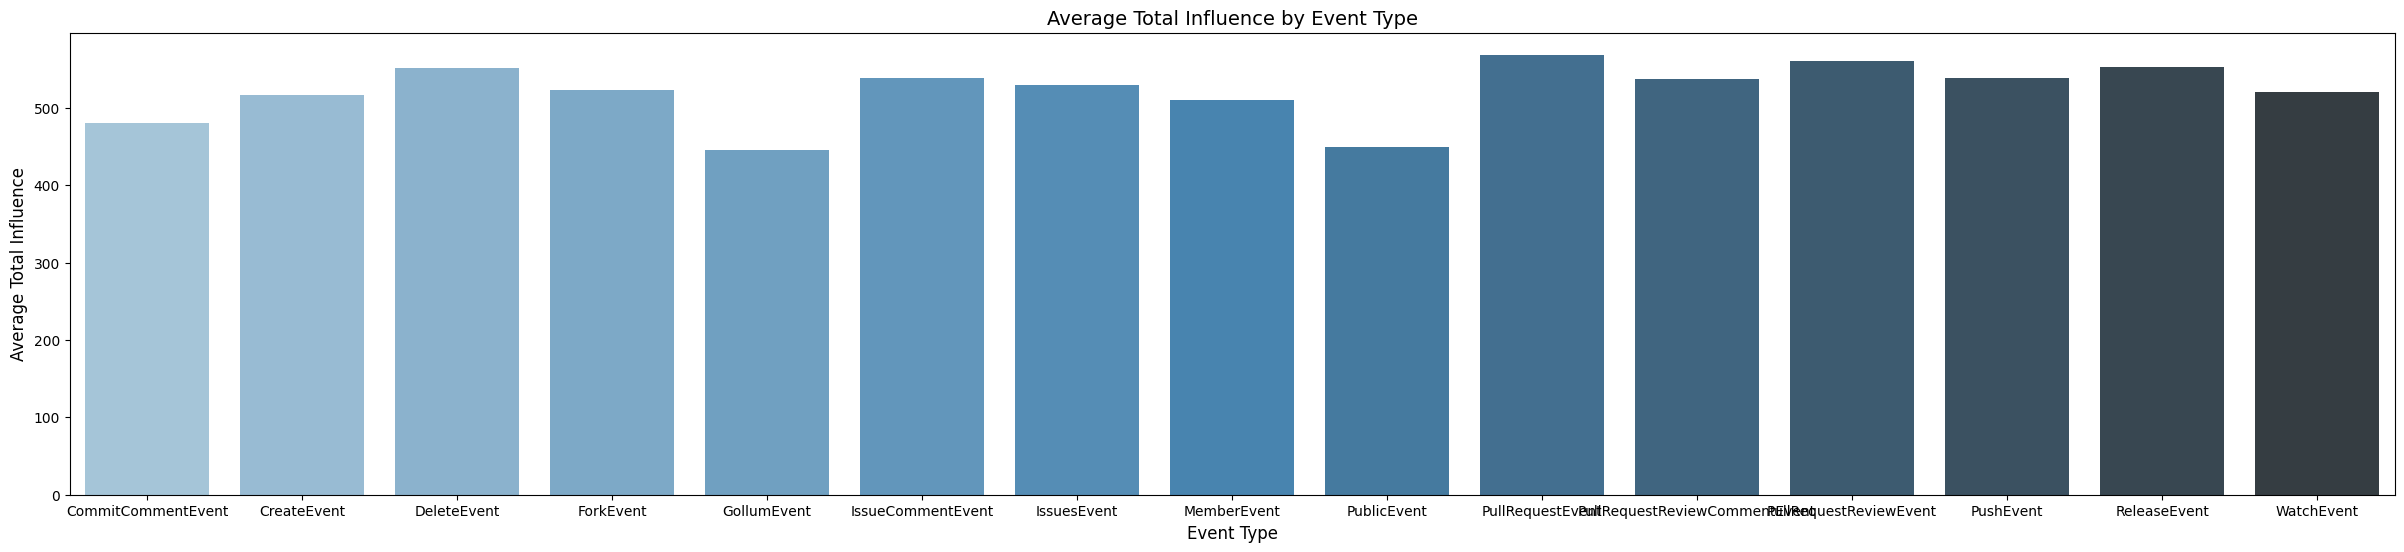

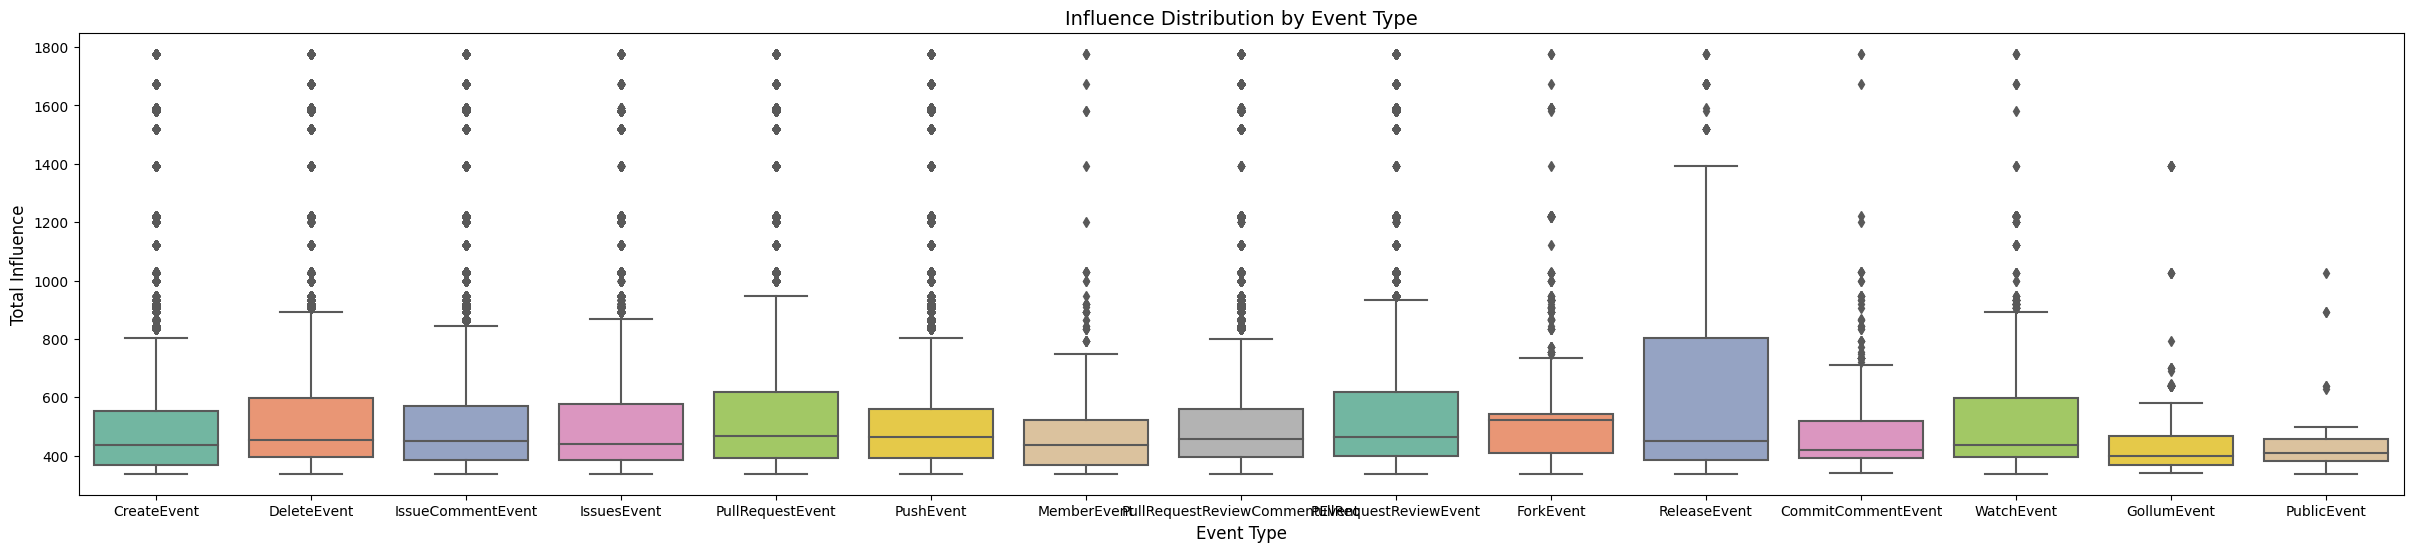

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
file_path = r"C:/Users/王志鸿\Desktop/导论/users_combined_info_500.csv"

# 加载数据
data = pd.read_csv(file_path)

# 创建 DataFrame
columns = ['user_id', 'name', 'location', 'total_influence', 'country', 'event_type', 'event_action', 'event_time']
df = pd.DataFrame(data, columns=columns)

# 先确保 'event_time' 列是 datetime 类型
df['event_time'] = pd.to_datetime(df['event_time'])

# 按 'user_id' 和 'event_time' 排序，确保每个用户的首次登录记录排在前面
df_sorted = df.sort_values(by=['user_id', 'event_time'])

# 按 event_type 分组并计算平均影响力
event_influence_avg = df.groupby('event_type')['total_influence'].mean().reset_index()

# 显示结果
print(event_influence_avg)


# 设置图形大小和样式
plt.figure(figsize=(30, 6))
sns.barplot(x='event_type', y='total_influence', data=event_influence_avg, palette='Blues_d')

# 添加标题和标签
plt.title('Average Total Influence by Event Type', fontsize=14)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Average Total Influence', fontsize=12)

# 显示图形
plt.show()

# 设置图形大小
plt.figure(figsize=(30, 6))

# 绘制箱型图
sns.boxplot(x='event_type', y='total_influence', data=df, palette='Set2')

# 添加标题和标签
plt.title('Influence Distribution by Event Type', fontsize=14)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Total Influence', fontsize=12)

# 显示图形
plt.show()


groupby('event_type'): 按 event_type 列进行分组。
mean(): 对每个 event_type 组计算 total_influence 列的均值。
sns.barplot(): 使用 seaborn 库绘制柱状图，展示不同事件类型下的平均影响力。
sns.boxplot(): 使用箱型图来展示不同事件类型下影响力的分布，帮助我们识别异常值和数据分散程度。

通过柱状图，你将能够直观地看到哪些事件类型与较高的平均影响力相关。如果某些事件类型的用户平均影响力较高，说明这些事件可能与高影响力用户（例如社交媒体意见领袖）相关联。如果使用箱型图，还可以观察到每个事件类型下影响力的波动范围和分布情况。

这种分析有助于揭示高影响力用户在某些特定活动中的偏好.

### 研究问题 2：事件行为与时间因素的关联


#### 问题描述：

    事件行为（如added、commented等）与事件发生的时间（event_time）之间是否存在周期性或时段性规律？例如，某些类型的事件行为在特定时间段（如工作日或周末）是否更加频繁？

#### 分析方法：

    为了回答这个问题，我们可以从以下几个角度进行数据分析：

    数据预处理：

        提取event_time字段中的日期、时间信息，进一步划分为日、周、月、季度和时段（如上午、下午、晚上）。
        将用户行为类型（如added、commented等）作为标签，统计每种行为在不同时间段的频次。

    周期性分析：

        日周期：分析不同时间段（例如，白天 vs. 晚上）的行为频率差异。
        周周期：分析事件行为是否在工作日（周一至周五）和周末（周六、周日）之间有差异。
        月周期：分析不同月份是否存在行为的季节性变化，例如，某些行为在节假日或者特定的月份更频繁发生。

    时段对比分析：

        早上/下午/晚上：根据用户行为的高峰时段，分析是否存在特定时段（如下午3点-5点，晚上7点-10点）更容易发生某种行为。
        工作日 vs. 周末：分析在工作日和周末之间，事件行为的频率是否存在明显差异。例如，用户是否更倾向于在周末参与某些活动，或者在工作日有更高的互动频率。

    行为类型的时段差异：

        比较不同的事件行为（如添加、评论、分享等）在不同时段的表现。例如，用户可能在工作日评论较多，而在周末更多进行内容分享或添加。
        特别关注极端行为模式，例如，是否有某些行为（如added）在特定时间段出现激增，可能与用户的空闲时间或社交需求相关。

#### 统计方法：

    描述性统计：

        首先进行频率分析，计算在不同时间段内每种事件行为的频率，并通过条形图或折线图展示。
        时间序列分析：使用时间序列分析方法检测某些行为的趋势性或季节性波动。可以使用季节性分解等方法，观察周期性变化。

    假设检验：

        如果存在明显的时间段差异，可以使用卡方检验（Chi-Square Test）或方差分析（ANOVA）检验不同时间段内行为类型的差异是否显著。

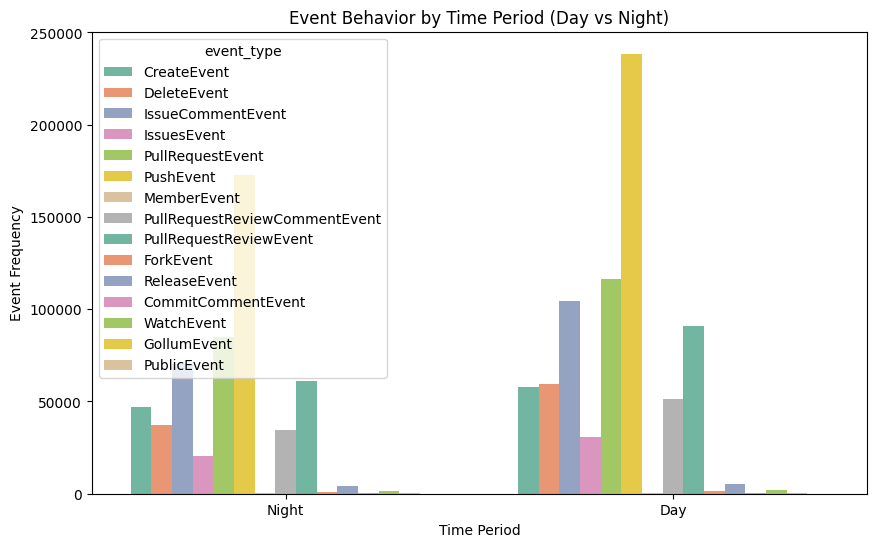

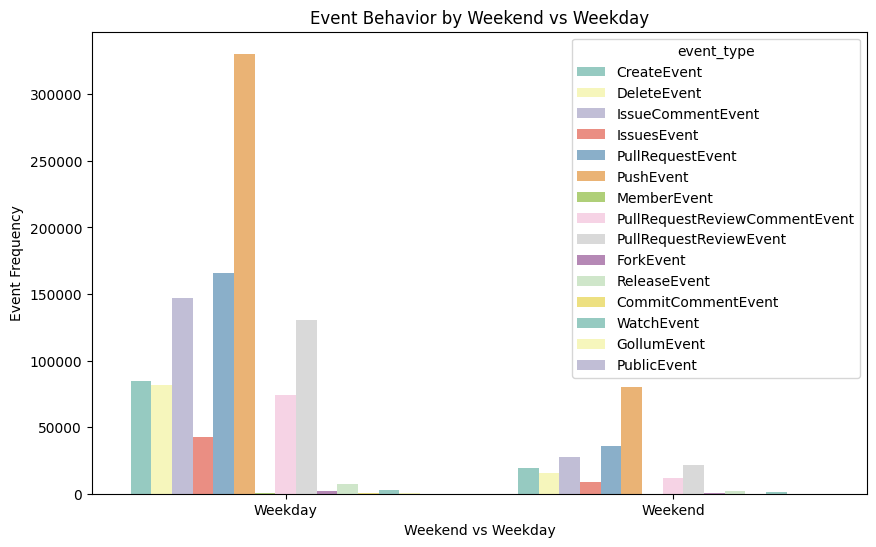

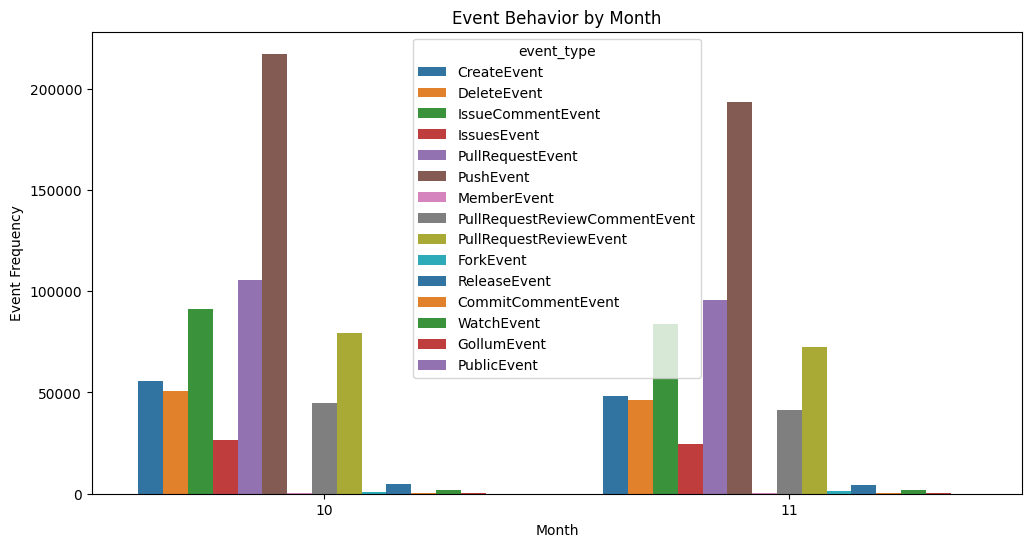

Chi-Square Statistic: 1306.343125390721
P-value: 2.3336049660814864e-270
有显著的时间段与事件行为关系
F-Statistic: 229.78200379643158
P-value: 7.046139808750876e-15
不同月份之间事件行为有显著差异


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway

# 示例数据
file_path = r"C:/Users/王志鸿\Desktop/导论/users_combined_info_500.csv"

# 加载数据
data = pd.read_csv(file_path)

# 创建 DataFrame
columns = ['user_id', 'name', 'location', 'total_influence', 'country', 'event_type', 'event_action', 'event_time']
df = pd.DataFrame(data, columns=columns)

# 先确保 'event_time' 列是 datetime 类型
df['event_time'] = pd.to_datetime(df['event_time'])

# 按 'user_id' 和 'event_time' 排序，确保每个用户的首次登录记录排在前面
df_sorted = df.sort_values(by=['user_id', 'event_time'])

# 提取日期、时间、星期几、小时等信息
df['date'] = df['event_time'].dt.date
df['hour'] = df['event_time'].dt.hour
df['day_of_week'] = df['event_time'].dt.weekday  # 0=Monday, 6=Sunday
df['month'] = df['event_time'].dt.month
df['year'] = df['event_time'].dt.year


#1. 日周期分析：分析不同时间段的事件行为（如白天 vs 晚上
# 创建时间段标签：白天（6:00 - 18:00） vs 晚上（18:00 - 6:00）
df['time_period'] = df['hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# 统计各时间段内的事件行为频次
time_period_counts = df.groupby(['time_period', 'event_type']).size().unstack(fill_value=0)


#2. 周周期分析：工作日 vs 周末
# 创建标签：工作日 vs 周末
df['weekend'] = df['day_of_week'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# 统计工作日和周末的行为频次
weekend_counts = df.groupby(['weekend', 'event_type']).size().unstack(fill_value=0)


#3. 月周期分析：各月份的事件行为频率
# 按月统计事件行为频次
monthly_counts = df.groupby(['month', 'event_type']).size().unstack(fill_value=0)



# 使用 seaborn 绘制白天和晚上的事件行为比较
plt.figure(figsize=(10, 6))
sns.countplot(x='time_period', hue='event_type', data=df, palette='Set2')
plt.title('Event Behavior by Time Period (Day vs Night)')
plt.xlabel('Time Period')
plt.ylabel('Event Frequency')
plt.show()

# 绘制工作日与周末事件行为的比较
plt.figure(figsize=(10, 6))
sns.countplot(x='weekend', hue='event_type', data=df, palette='Set3')
plt.title('Event Behavior by Weekend vs Weekday')
plt.xlabel('Weekend vs Weekday')
plt.ylabel('Event Frequency')
plt.show()

# 绘制按月的事件行为分布
plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='event_type', data=df, palette='tab10')
plt.title('Event Behavior by Month')
plt.xlabel('Month')
plt.ylabel('Event Frequency')
plt.show()

# 1 卡方检验：是否时间段与事件行为有显著关系
contingency_table = pd.crosstab(df['time_period'], df['event_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# 如果p值小于0.05，则认为时间段和事件行为类型之间有显著关系
if p < 0.05:
    print("有显著的时间段与事件行为关系")
else:
    print("时间段与事件行为之间没有显著关系")

# 2 方差分析：检查不同月份的事件行为频率差异
event_types = df['event_type'].unique()
monthly_event_counts = [df[df['event_type'] == et]['month'].value_counts().sort_index() for et in event_types]

# 进行ANOVA检验
f_stat, p_value = f_oneway(*monthly_event_counts)

print(f"F-Statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("不同月份之间事件行为有显著差异")
else:
    print("不同月份之间事件行为没有显著差异")
